In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Rain-Classification

In [2]:
df_umbrella = pd.DataFrame(
    {
        'Chance of Rainy': [.1, .9, .3, .1,],
        'UV Index': [11, 1, 3, 2,],
        'Umbrella': [True, True, False, False, ],
    }
)

df_umbrella.head()

,Chance of Rainy,UV Index,Umbrella
0,0.1,11,True
1,0.9,1,True
2,0.3,3,False
3,0.1,2,False


In [3]:
feature_names = ['Chance of Rainy', 'UV Index']
target = 'Umbrella'

In [4]:
clf = DecisionTreeClassifier().fit(df_umbrella[feature_names], df_umbrella[target])

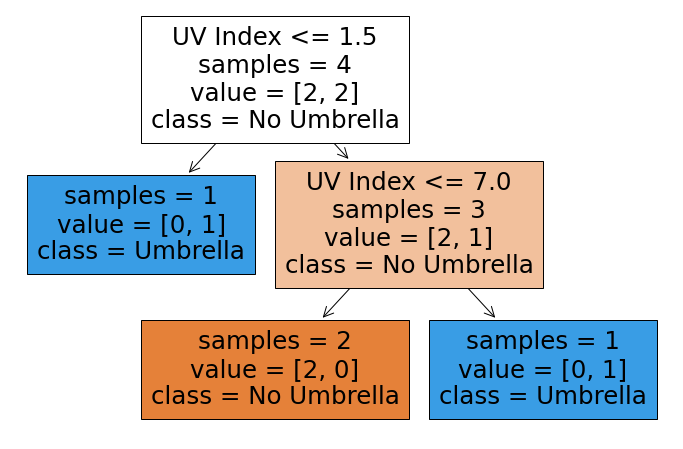

In [5]:
plt.figure(figsize=(12, 8));

plot_tree(
    clf, 
    filled=True, 
    feature_names=feature_names, 
    class_names=['No Umbrella', 'Umbrella'],
    impurity=False
)

plt.show()

<Figure size 720x360 with 0 Axes>

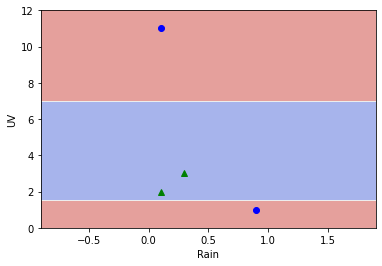

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(clf, 
                                              df_umbrella[feature_names], 
                                              response_method="predict",
                                              xlabel='Rain', ylabel='UV',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(df_umbrella['Chance of Rainy'][df_umbrella[target]],df_umbrella['UV Index'][df_umbrella[target]], 'bo')
plt.plot(df_umbrella['Chance of Rainy'][~df_umbrella[target]],df_umbrella['UV Index'][~df_umbrella[target]], 'g^')
plt.show()

## Decision Tree for Iris data

In [7]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

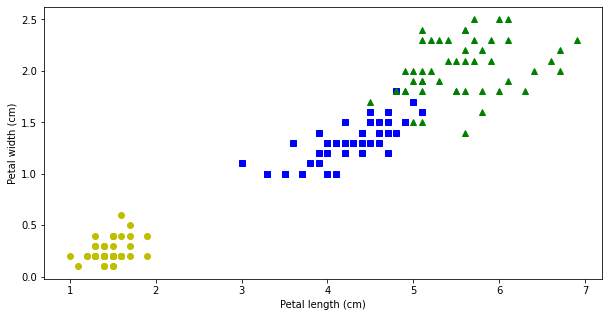

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(X_iris[:, 0][y_iris == 0], X_iris[:, 1][y_iris == 0],'yo')
plt.plot(X_iris[:, 0][y_iris == 1], X_iris[:, 1][y_iris == 1],'bs')
plt.plot(X_iris[:, 0][y_iris == 2], X_iris[:, 1][y_iris == 2],'g^')
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

In [14]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

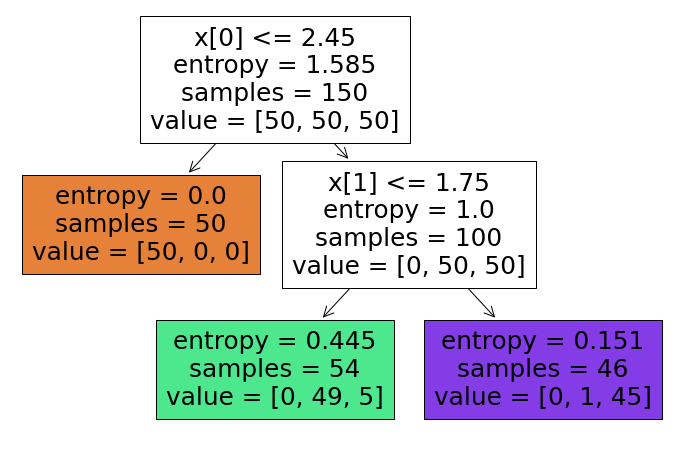

In [15]:
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True)

<Figure size 720x360 with 0 Axes>

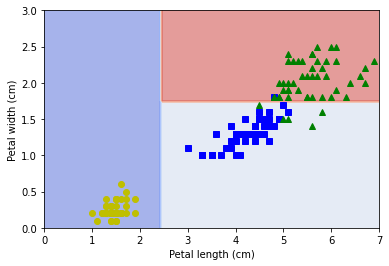

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(tree_clf, 
                                              X_iris, 
                                              response_method="predict",
                                              xlabel='Petal length (cm)', ylabel='Petal width (cm)',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X_iris[:, 0][y_iris == 0], X_iris[:, 1][y_iris == 0],'yo')
plt.plot(X_iris[:, 0][y_iris == 1], X_iris[:, 1][y_iris == 1],'bs')
plt.plot(X_iris[:, 0][y_iris == 2], X_iris[:, 1][y_iris == 2],'g^')
plt.axis([0,7,0,3])
plt.show()

[Text(0.4444444444444444, 0.9166666666666666, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[1] <= 1.45\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= 4.55\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.777777777777777

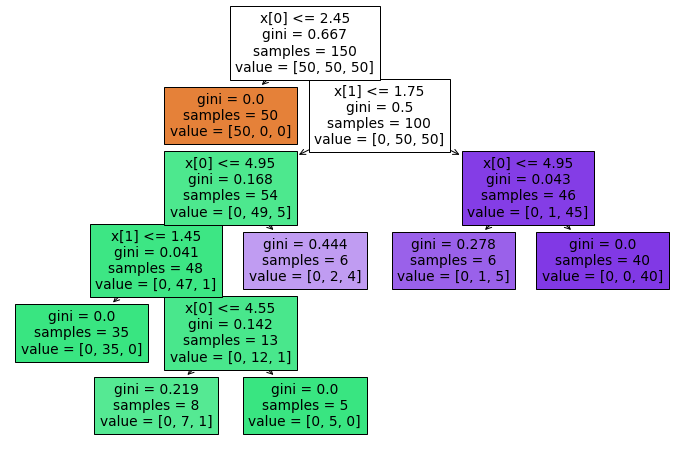

In [41]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5 , random_state=42)
tree_clf.fit(X_iris, y_iris)

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True)

<Figure size 864x576 with 0 Axes>

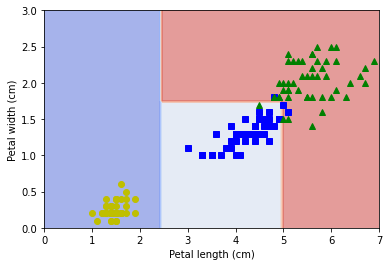

In [42]:
plt.figure(figsize=(12, 8))
disp = DecisionBoundaryDisplay.from_estimator(tree_clf, 
                                              X_iris, 
                                              response_method="predict",
                                              xlabel='Petal length (cm)', ylabel='Petal width (cm)',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X_iris[:, 0][y_iris == 0], X_iris[:, 1][y_iris == 0],'yo')
plt.plot(X_iris[:, 0][y_iris == 1], X_iris[:, 1][y_iris == 1],'bs')
plt.plot(X_iris[:, 0][y_iris == 2], X_iris[:, 1][y_iris == 2],'g^')
plt.axis([0,7,0,3])
plt.show()

## Try out Decision tree with other features, try setting max_depth to different values.

# Decision Tree Regression

In [44]:
import numpy as np

In [45]:
n = 200

height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

df_height = pd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height': np.concatenate((height_f, height_m))
    }
)

df_height.head()

,Gender,Height
0,1,160.826314
1,1,152.617425
2,1,153.630926
3,1,157.558458
4,1,152.549670


In [46]:
df_height['Gender'].value_counts()

1    400
2    400
Name: Gender, dtype: int64

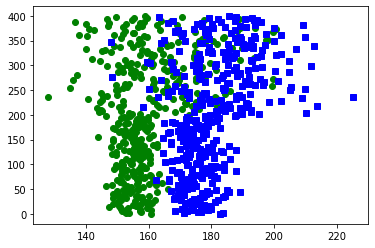

In [47]:
plt.plot(df_height['Height'][df_height['Gender']==1], range(400), 'go')
plt.plot(df_height['Height'][df_height['Gender']==2], range(400), 'bs')
plt.show()

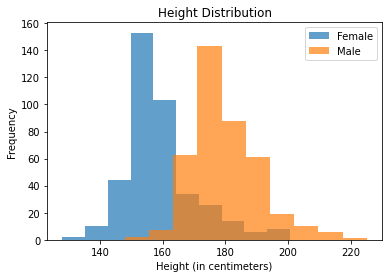

In [48]:
df_height[df_height['Gender'] == 1]['Height'].plot(
    label='Female', kind='hist', 
    bins=10, alpha=0.7
)
df_height[df_height['Gender'] == 2]['Height'].plot(
    label='Male', kind='hist', 
    bins=10, alpha=0.7
)

# ax.set_xlim(140, 200)
plt.legend()
plt.title('Height Distribution')
plt.xlabel('Height (in centimeters)')

plt.show()

In [49]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_height, test_size=0.3, random_state=22)

x_train = df_train[['Gender']]
x_test  = df_test[['Gender']]

y_train = df_train['Height']
y_test  = df_test['Height']

from sklearn.tree import DecisionTreeRegressor, plot_tree

clf = DecisionTreeRegressor()

clf.fit(x_train.values, y_train.values)

DecisionTreeRegressor()

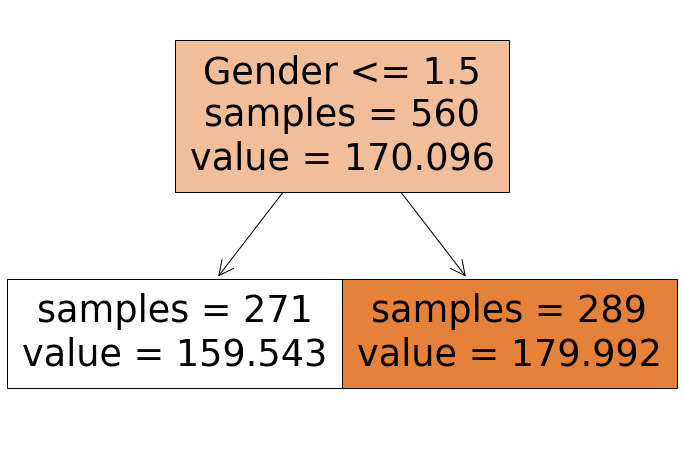

In [50]:
plt.figure(figsize=(12, 8));

plot_tree(
    clf, 
    filled=True, 
    feature_names=['Gender'], 
    impurity=False
)

plt.show()

In [51]:
df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       159.0  156.6
2       180.0  177.9

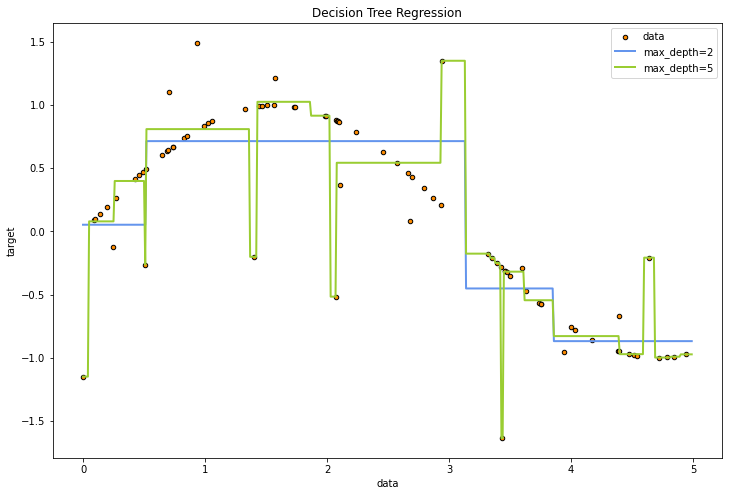

In [53]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Random Forests

In [54]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

[]

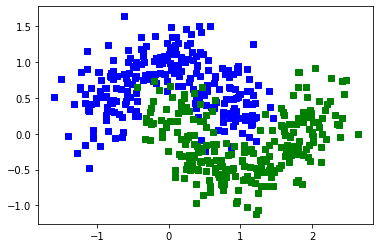

In [55]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bs')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'gs')
plt.plot()

In [60]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

[]

<Figure size 720x360 with 0 Axes>

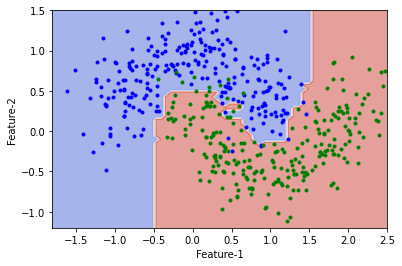

In [61]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(rnd_clf, 
                                              X,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.axis([-1.8,2.5,-1.2,1.5])
plt.plot()

## Random Forest with Iris Dataset

In [62]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

[]

<Figure size 720x360 with 0 Axes>

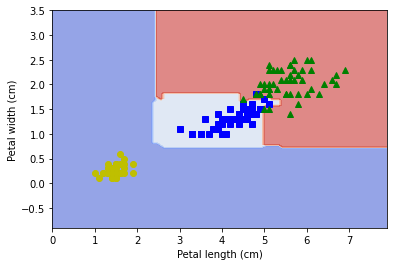

In [66]:
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, min_samples_leaf=1)
rnd_clf.fit(X_iris, y_iris)

plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(rnd_clf, 
                                              X_iris,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.6, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X_iris[:, 0][y_iris == 0], X_iris[:, 1][y_iris == 0],'yo')
plt.plot(X_iris[:, 0][y_iris == 1], X_iris[:, 1][y_iris == 1],'bs')
plt.plot(X_iris[:, 0][y_iris == 2], X_iris[:, 1][y_iris == 2],'g^')
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot()